In [2]:
%cd ..

/home/ivallesp/projects/cFavorita


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/train.csv")
df.date = pd.to_datetime(df.date, format="%Y-%m-%d")
df["dayofyear"] = df.date.dt.dayofyear
df["year"] = df.date.dt.year

/home/ivallesp/projects/cFavorita/.venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df["dayofweek"] = df.date.dt.dayofweek


In [6]:
df["week"] = df.date.dt.week


In [7]:
df_agg_product = df.groupby("item_nbr").unit_sales.sum()
df_agg_store = df.groupby("store_nbr").unit_sales.sum()


In [8]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [9]:
xx=df_agg_product.sort_values(ascending=False).reset_index().unit_sales

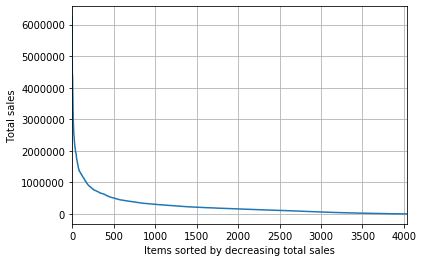

In [10]:
df_agg_product.sort_values(ascending=False).reset_index().unit_sales.plot(grid=True)
plt.xlabel("Items sorted by decreasing total sales")
plt.ylabel("Total sales")
plt.savefig("items_tail.eps")

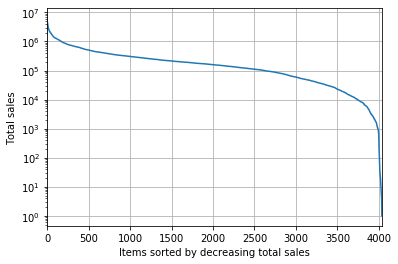

In [11]:
df_agg_product.sort_values(ascending=False).reset_index().unit_sales.plot(grid=True, 
                                                                          logy=True)
plt.xlabel("Items sorted by decreasing total sales")
plt.ylabel("Total sales")
plt.savefig("items_tail_log.eps")

In [12]:
x = df_agg_product.sort_values(ascending=False).values

x[0:round(len(x)*0.1)].sum()/x.sum()

0.4420022268415848

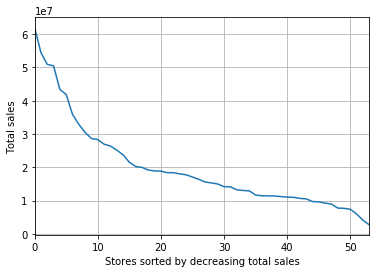

In [13]:
df_agg_store.sort_values(ascending=False).reset_index().unit_sales.plot(grid=True)
plt.xlabel("Stores sorted by decreasing total sales")
plt.ylabel("Total sales")
plt.savefig("stores_tail.eps")

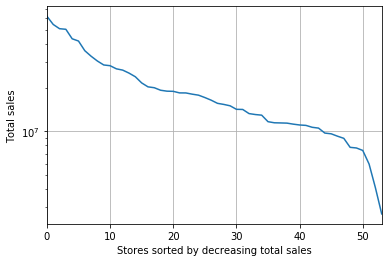

In [14]:
df_agg_store.sort_values(ascending=False).reset_index().unit_sales.plot(grid=True,
                                                                          logy=True)
plt.xlabel("Stores sorted by decreasing total sales")
plt.ylabel("Total sales")
plt.savefig("stores_tail_log.eps")

In [ ]:
x=df_agg_store.sort_values(ascending=False).reset_index().unit_sales.plot(grid=True, 
                                                                          xlabel="Stores sorted by decreasing total sales",
                                                                          ylabel="Total sales (log)",
                                                                          logy=True)
x.set_yticks([1000000, 2000000, 4000000, 6000000, 8000000,
              10000000, 20000000, 40000000, 60000000, 80000000, 100000000])

x.set_yticklabels(["$10^6$", "$2\cdot10^6$", "$4\cdot10^6$", "$6\cdot10^6$", "$8\cdot10^6$",
             "$10^7$", "$2\cdot10^7$", "$4\cdot10^7$", "$6\cdot10^7$", "$8\cdot10^7$", "$10^8$"])
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
x.xaxis.major.formatter._useMathText = True

plt.savefig("docs/article/img/stores_tail_log.eps")

In [15]:
x = df_agg_store.sort_values(ascending=False).values

x[:10].sum()/x.sum()

0.4017480874788964

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


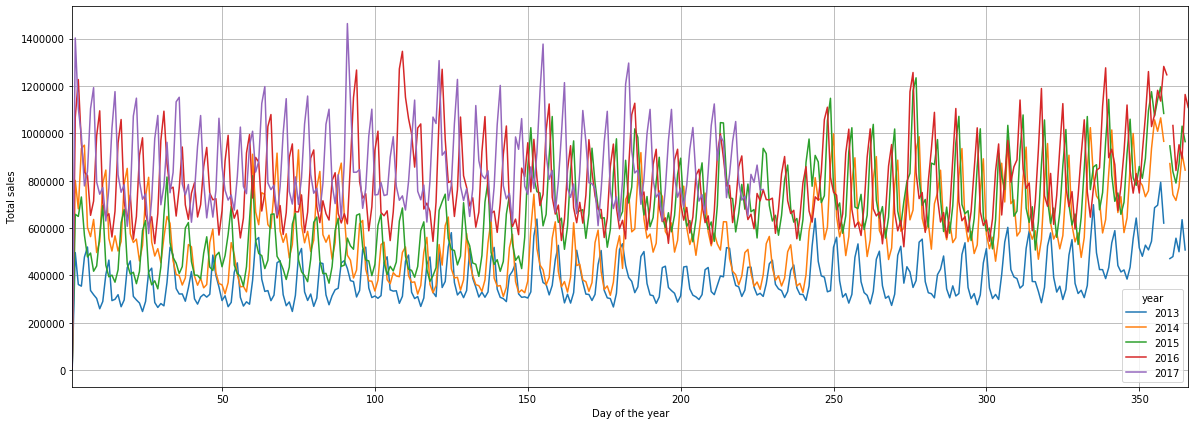

In [16]:
(df.groupby(["dayofyear", "year"]).unit_sales.sum()
 .reset_index().pivot(index="dayofyear", columns="year", values="unit_sales").plot(figsize=(20,7),
                grid=True))
plt.xlabel("Day of the year")
plt.ylabel("Total sales")
plt.savefig("timeseries.eps")

In [17]:
df_plot = (df.loc[lambda d:d.year==2014].assign(dayofweek=lambda d:d.dayofweek+1)
           .groupby(["dayofweek", "week"]).unit_sales.sum()
           .reset_index().pivot(index="dayofweek", columns="week", values="unit_sales")).dropna(axis=1)

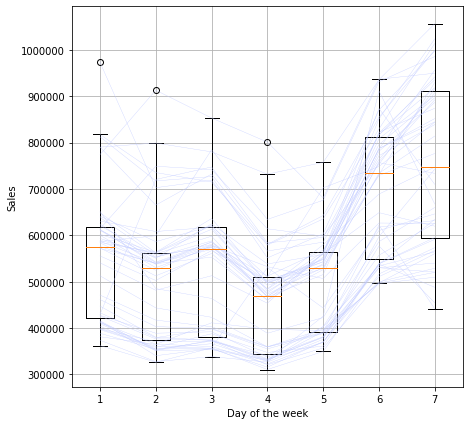

In [18]:
plt.figure(figsize=(7, 7))
plt.boxplot([df_plot.loc[x].tolist() for x in df_plot.index])
for x in df_plot.columns:
    plt.plot(df_plot[x], color="#bfc9ff", linewidth=0.3)
plt.grid()
plt.xlabel("Day of the week")
plt.ylabel("Sales")
plt.savefig("timeseries_dow.eps")

In [116]:
df.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,dayofyear,year,dayofweek,week
0,0,2013-01-01,25,103665,7.0,NaN,1,2013,1,1
1,1,2013-01-01,25,105574,1.0,NaN,1,2013,1,1
2,2,2013-01-01,25,105575,2.0,NaN,1,2013,1,1
3,3,2013-01-01,25,108079,1.0,NaN,1,2013,1,1
4,4,2013-01-01,25,108701,1.0,NaN,1,2013,1,1


In [117]:
days_with_sales = df.groupby(["store_nbr", "item_nbr"]).date.count()

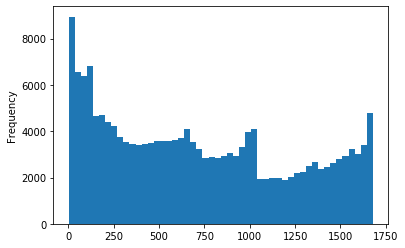

In [118]:
days_with_sales.plot.hist(bins=50)

In [119]:
days_with_sales.value_counts().sort_values()

1049      38
1047      41
1193      42
1158      43
1104      43
1046      43
1258      44
1139      44
1122      44
1100      45
1157      45
1127      46
1116      46
1072      46
1108      46
1079      46
1182      47
1146      47
1123      47
1153      47
1209      47
1198      47
1120      48
1053      48
1181      49
1162      49
1221      49
1191      49
1161      49
1230      49
        ... 
21       225
11       228
17       229
14       229
82       233
1678     233
107      235
15       238
62       238
112      240
16       243
1015     249
13       250
9        252
115      253
8        253
18       254
10       256
7        262
6        290
116      297
5        310
4        317
117      327
1016     361
3        369
1679     405
118      473
2        479
1       1013
Name: date, Length: 1679, dtype: int64

In [120]:
days_with_sales

store_nbr  item_nbr
1          96995        187
           99197        185
           103520      1119
           103665      1358
           105574      1546
           105575      1671
           105577       863
           105693       553
           105737      1005
           105857      1149
           106716      1322
           108079       799
           108634       325
           108696      1088
           108698      1367
           108701      1088
           108786      1323
           108797      1312
           108831       546
           108862       900
           108952      1158
           111223      1523
           111397      1267
           112830      1167
           114778      1251
           114790      1612
           114799       701
           114800      1438
           115267      1344
           115611      1537
                       ... 
54         2081064      135
           2081095      116
           2081142       26
           2081161      130
